In [8]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import nibabel as nib
import scipy
from scipy.stats import spearmanr
from itertools import product
import sys
sys.path.insert(1, '/export03/data/opt/hippunfold_toolbox/hippunfold_toolbox')
import plotting
import utils
import copy
import glob
sys.path.insert(1, '/export03/data/opt/Hippo_Spin_Testing')
from hippo_spin_testing import spin_test
from adjustText import adjust_text
sys.path.insert(1, '/data/mica1/01_programs/micapipe-v0.2.0/functions')
from build_mpc import build_mpc
from brainspace.gradient import GradientMaps
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
files = [
 '../maps/HippoMaps-initializationMaps/Dataset-BigBrain/histology-Merker_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AxerPLI/histology-PLI-transmittance_average-1_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Bieloschowsky_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Blockface_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Parvalbumin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Thionin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Calbindin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/histology-Calretinin_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
    
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/MRI-9p4T-qR1_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/MRI-9p4T-qR2star_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-AHEAD/MRI-9p4T-ProtonDensity_average-4_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-qT1_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-FA_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-ADC_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-T2star_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-MTR_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',

 '../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-rsfMRI-IntTS_average-99_hemi-L_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-rsfMRI-ReHo_average-99_hemi-L_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs/MRI-3T-rsfMRI-avgFCneocort_average-80_hemi-L_den-2mm_label-hipp.shape.gii',

 '../maps/HippoMaps-initializationMaps/Dataset-MICs+Frauscher/iEEG-BandPower-delta_average-81_hemi-mix_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs+Frauscher/iEEG-BandPower-theta_average-81_hemi-mix_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs+Frauscher/iEEG-BandPower-alpha_average-81_hemi-mix_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs+Frauscher/iEEG-BandPower-beta_average-81_hemi-mix_den-2mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-MICs+Frauscher/iEEG-BandPower-gamma_average-81_hemi-mix_den-2mm_label-hipp.shape.gii',

 '../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-curvature_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-curvature_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-gyrification_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-gyrification_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-Mixed/histology-thickness_average-7_hemi-mix_den-unfoldiso_label-hipp.shape.gii',
 '../maps/HippoMaps-initializationMaps/Dataset-PNI/MRI-7T-thickness_average-20_hemi-mix_den-0p5mm_label-hipp.shape.gii',
 ]

In [51]:
# organize into sensible blocks of the same modality

blocks_len = [8,8,3,5,6]
blocks = np.concatenate(([0],np.cumsum(blocks_len)))
colors = np.hstack((np.ones((blocks_len[0])),np.ones((blocks_len[1]))+1,np.ones((blocks_len[2]))+2,np.ones((blocks_len[3]))+3,np.ones((blocks_len[4]))+4))
feature_n = np.array([])
for f in blocks_len:
    feature_n = np.concatenate((n,np.arange(1,f+1)))

In [50]:
# load all data
features = []
cdata = np.ones((7262,len(files)))
for f in range(len(files)):
    features.append(files[f].split('/')[-1].split('_')[0])
    den = files[f].split('/')[-1].split('_')[3][4:]
    cdata[:,f],_,_ = utils.density_interp(den,'0p5mm',nib.load(files[f]).darrays[0].data, label='hipp')

In [5]:
# check for significant correlation (spin test) (slow!)

feat_corr_p = np.ones((len(features),len(features)))
for i in range(len(features)):
    for j in range(i+1,len(features)):
        _,_,feat_corr_p[i,j],_ = spin_test.spin_test(cdata[:,i],cdata[:,j], 10000, space='orig')

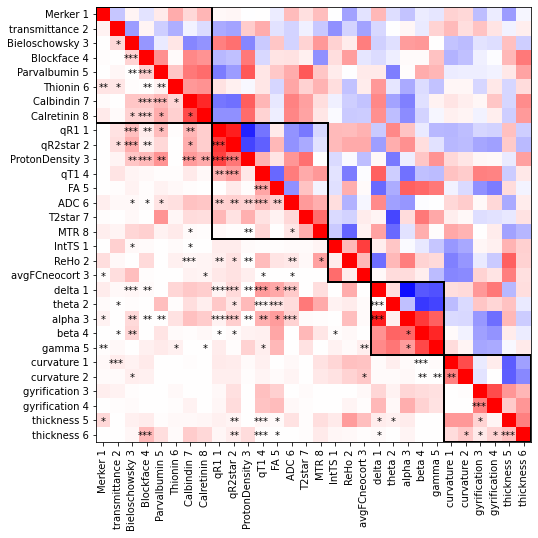

In [59]:
# plot correlation between features

feat_corr = np.corrcoef(cdata.T)

# bottom left will show Rsquared
iloc = np.tril_indices(len(feat_corr))
feat_corr[iloc] = feat_corr[iloc]**2

# plot and label
features_suffix = []
for f,feat in enumerate(features):
    features_suffix.append(feat.split('-')[-1] + ' ' + str(int(feature_n[f])))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(feat_corr, vmin=-1, vmax=1, cmap='bwr')
plt.yticks(ticks=range(len(features)),labels=features_suffix);
plt.xticks(ticks=range(len(features)),labels=features_suffix, rotation=90);

# box around same modality
for i in range(len(blocks)-1):
    w = blocks[i+1]-blocks[i]
    rect = Rectangle((blocks[i]-.5,blocks[i]-.5),w,w, linewidth=2, edgecolor='k', facecolor='none')
    ax.add_patch(rect)

# annotate significant correlations
for i in range(len(features)):
    for j in range(i+1,len(features)):
        if feat_corr_p[i,j] < 0.001:
            plt.annotate('***', (i-.6,j+.3));
        elif feat_corr_p[i,j] < 0.01:
            plt.annotate('**', (i-.3,j+.3));
        elif feat_corr_p[i,j] < 0.05:
            plt.annotate('*', (i-.15,j+.3));

cdata all NaN


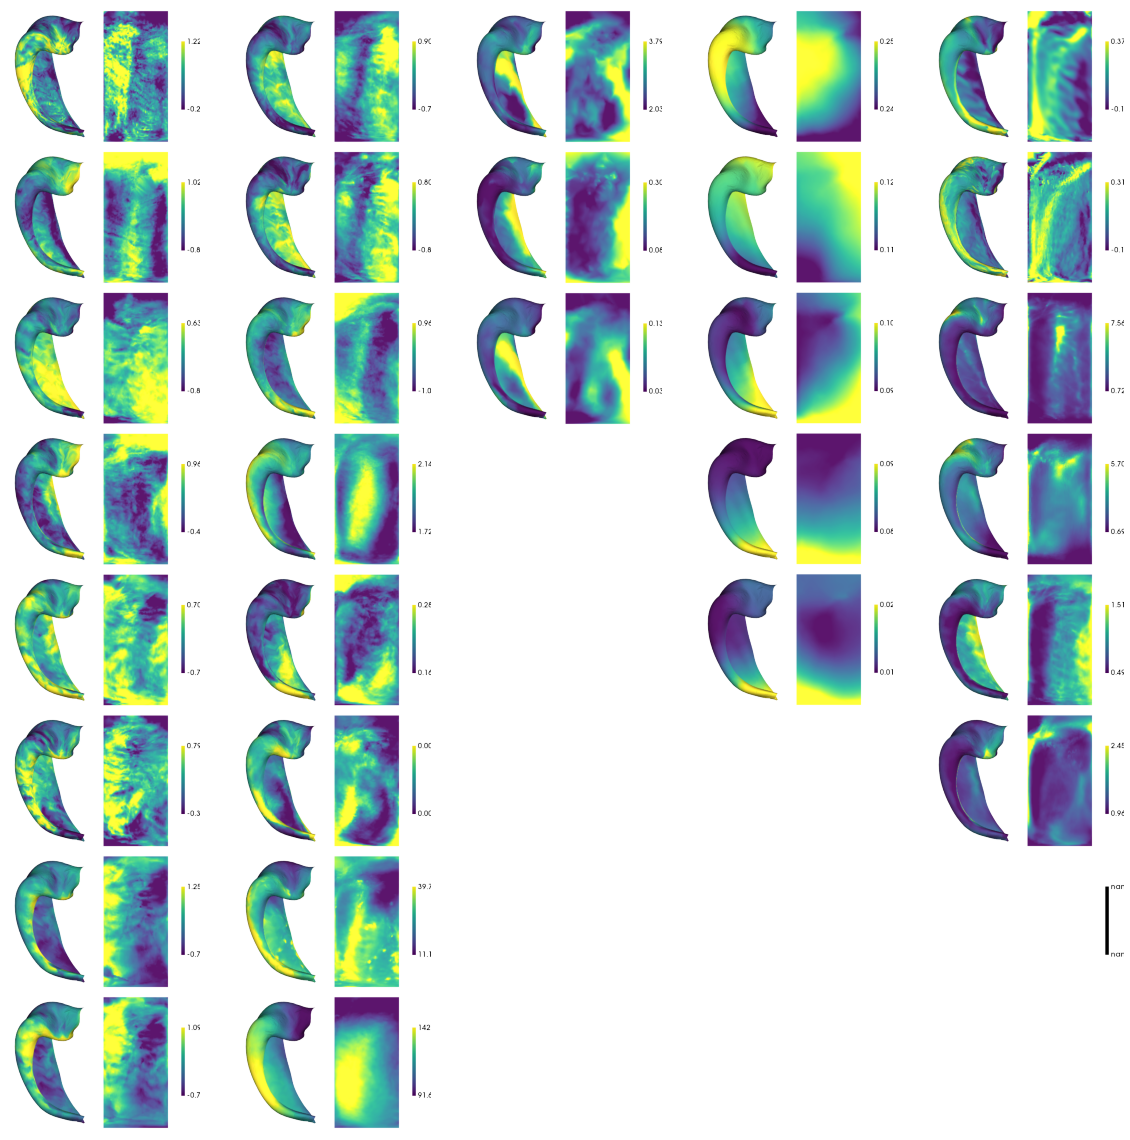

In [52]:
# currently there is a bug where 9 plots are not allowed, but 10 are, so we add an extra empty plot
cdata = np.concatenate((cdata,np.ones((cdata.shape[0],1))*np.nan),axis=1)
blocks[-1] = blocks[-1]+1

# plot all feature maps in the same plot
fig, ax = plt.subplots(1,5, figsize=(20,50))
for b in range(5):
    plotting.surfplot_canonical_foldunfold(cdata[:,blocks[b]:blocks[b+1]], color_bar=('right'), hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', tighten_cwindow=True, embed_nb=True, screenshot=True, filename='tmp.png')
    f = plt.imread('tmp.png')
    ax[b].imshow(f)
    ax[b].set_axis_off()
    ax[b].set_anchor("NW")

cdata = cdata[:,:-1]
!rm tmp.png

/export03/data/opt/venv/lib/python3.8/site-packages/brainspace/plotting/base.py:287: UserWarning: Interactive mode requires 'panel'. Setting 'interactive=False'
  warnings.warn("Interactive mode requires 'panel'. "


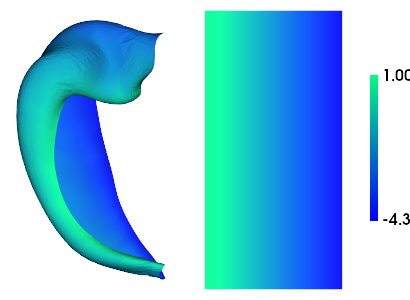

In [8]:
subfields = nib.load('/data/mica3/BIDS_PNI/derivatives/hippunfold_v1.3.0_supersession/hippunfold/sub-PNC002/surf/sub-PNC002_hemi-L_space-T1w_den-0p5mm_label-hipp_atlas-histologyReference2023_subfields.label.gii').darrays[0].data
AP,_,_ = utils.density_interp('unfoldiso','0p5mm',repmat(np.linspace(0,1,254),126,1).flatten(), label='hipp')
PD,_,_ = utils.density_interp('unfoldiso','0p5mm',repmat(np.linspace(0,1,126),254,1).T.flatten(), label='hipp')
plotting.surfplot_canonical_foldunfold(PD, color_bar=('right'), hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='winter', tighten_cwindow=False, embed_nb=True)

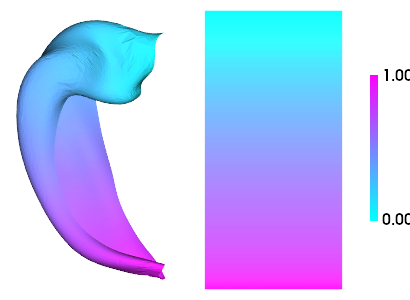

In [9]:
plotting.surfplot_canonical_foldunfold(AP, color_bar=('right'), hemis=['L'], labels=['hipp'], unfoldAPrescale=True, share='row', cmap='cool', tighten_cwindow=False, embed_nb=True)

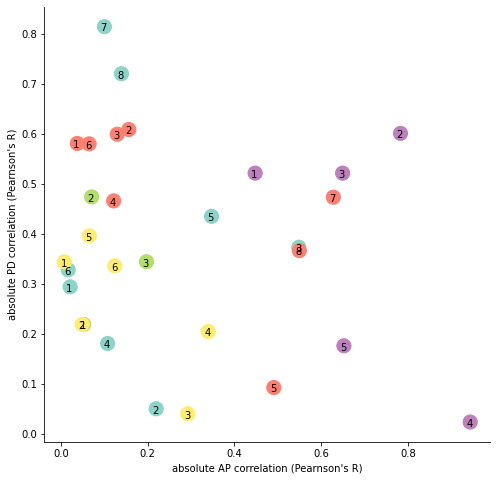

In [79]:
axiscorr = np.abs(np.corrcoef(np.concatenate((cdata,AP.reshape(7262,1),PD.reshape(7262,1)),axis=1).T)[-2:,:-2])

fig, ax = plt.subplots(figsize=(8,8))
ax.spines[['right', 'top']].set_visible(False)
ax.scatter(axiscorr[0],axiscorr[1],c=colors,cmap='Set3', s=200)
plt.xlabel("absolute AP correlation (Pearnson's R)")
plt.ylabel("absolute PD correlation (Pearnson's R)")

for f,feature in enumerate(features):
    ax.annotate(str(int(feature_n[f])), (axiscorr[0,f]-.009, axiscorr[1,f]-.009))

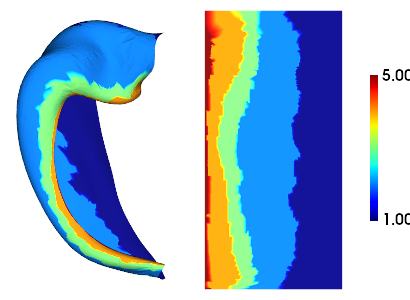

In [11]:
plotting.surfplot_canonical_foldunfold(subfields, color_bar=('right'), hemis=['L'], labels=['hipp'], cmap='jet', unfoldAPrescale=True, share='row', tighten_cwindow=False, embed_nb=True)

In [12]:
list(product(np.arange(3), repeat=3))

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [13]:
perms = list(product([1,2,3,4,5],repeat=5))
subfields_permuted = np.ones((len(subfields),len(perms)))*np.nan
for p in range(len(perms)):
    newsf = np.ones((len(subfields)))*np.nan
    for s in range(5):
        newsf[subfields==s+1] = perms[p][s]
    subfields_permuted[:,p] = newsf

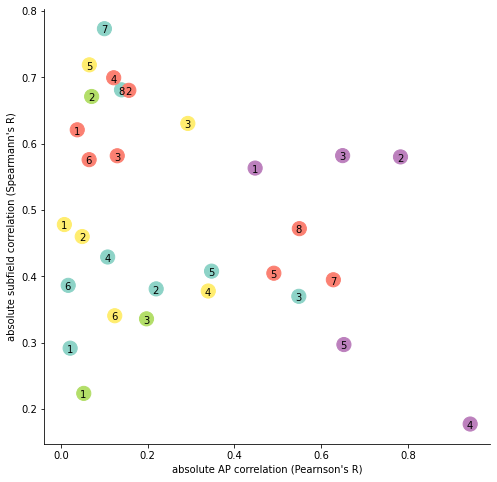

In [78]:
subfieldscorr = np.abs(spearmanr(np.concatenate((cdata,subfields_permuted),axis=1))[0][len(features):,:len(features)])
subfieldsmaxcorr = np.nanmax(subfieldscorr,axis=0)

fig, ax = plt.subplots(figsize=(8,8))
ax.spines[['right', 'top']].set_visible(False)
ax.scatter(axiscorr[0],subfieldsmaxcorr,c=colors,cmap='Set3',s=200)
plt.ylabel("absolute subfield correlation (Spearmann's R)")
plt.xlabel("absolute AP correlation (Pearnson's R)")

for f,feature in enumerate(features):
    ax.annotate(str(int(feature_n[f])), (axiscorr[0,f]-.008, subfieldsmaxcorr[f]-.007))

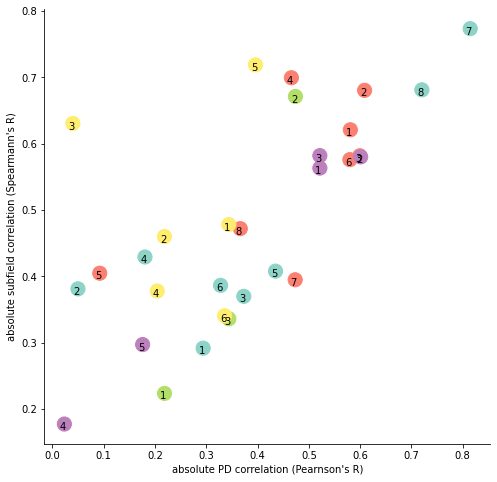

In [77]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(axiscorr[1],subfieldsmaxcorr,c=colors,cmap='Set3',s=200)
ax.spines[['right', 'top']].set_visible(False)
plt.ylabel("absolute subfield correlation (Spearmann's R)")
plt.xlabel("absolute PD correlation (Pearnson's R)")

for f,feature in enumerate(features):
    ax.annotate(str(int(feature_n[f])), (axiscorr[1,f]-.009, subfieldsmaxcorr[f]-.009))

In [118]:
# gradient decomposition
ngrads=5
mmgm = GradientMaps(n_components=ngrads, kernel='pearson', random_state=0)
mmgm.fit(scipy.stats.zscore(cdata), sparsity=0.1)

GradientMaps(kernel='pearson', n_components=5, random_state=0)

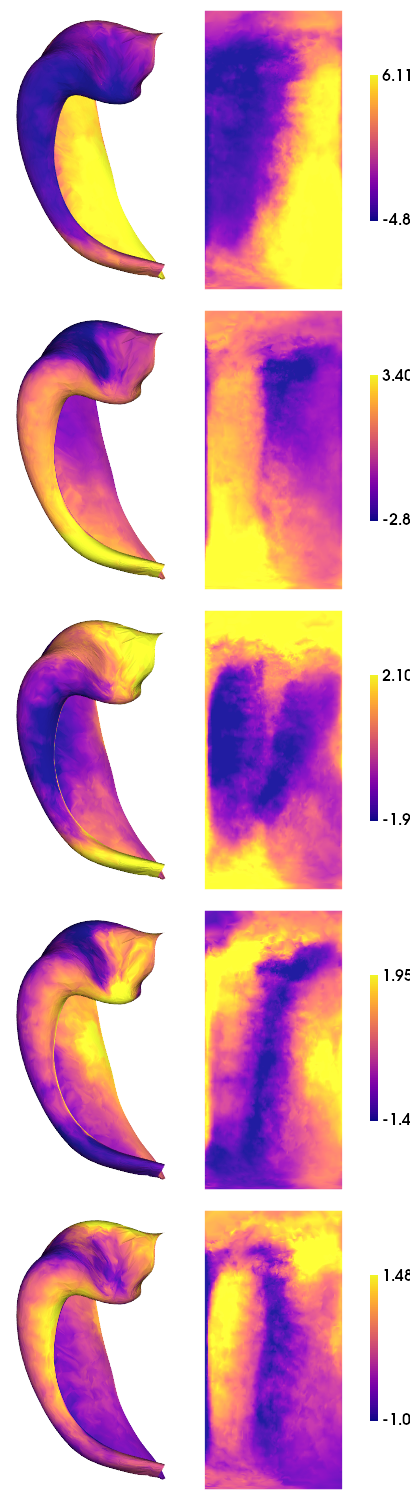

In [119]:
plotting.surfplot_canonical_foldunfold(mmgm.gradients_, labels=['hipp'], hemis=['L'], unfoldAPrescale=True, cmap='plasma', color_bar='right', share='row', tighten_cwindow=True, embed_nb=True)

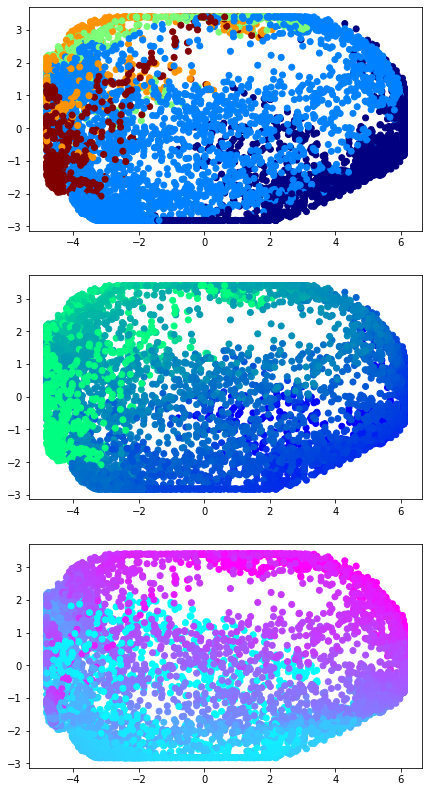

In [120]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 14))
ax[0].scatter(mmgm.gradients_[:,0], mmgm.gradients_[:,1], c=subfields, cmap='jet')
ax[0].set_aspect('equal', 'box')
ax[1].scatter(mmgm.gradients_[:,0], mmgm.gradients_[:,1], c=PD, cmap='winter')
ax[1].set_aspect('equal', 'box')
ax[2].scatter(mmgm.gradients_[:,0], mmgm.gradients_[:,1], c=AP, cmap='cool')
ax[2].set_aspect('equal', 'box')

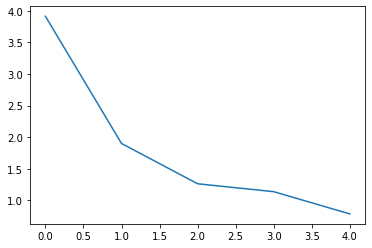

In [123]:
plt.plot(mmgm.lambdas_)

In [80]:
mmgm.lambdas_/np.sum(mmgm.lambdas_)

array([0.43467193, 0.21114414, 0.14034947, 0.12646083, 0.08737363])

# shelf

In [76]:
# save everything
import shelve
filename='../checkpoints/DimReduct.out'
my_shelf = shelve.open(filename,'n') # 'n' for new
for key in dir():
    try:
        my_shelf[key] = globals()[key]
    except:
        # __builtins__, my_shelf, and imported modules can not be shelved.
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: copy
ERROR shelving: exit
ERROR shelving: get_ipython
ERROR shelving: glob
ERROR shelving: my_shelf
ERROR shelving: nib
ERROR shelving: np
ERROR shelving: plotting
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: spin_test
ERROR shelving: sys
ERROR shelving: utils


In [4]:
# load everything
import shelve
filename='../checkpoints/DimReduct.out'
my_shelf = shelve.open(filename)
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print(my_shelf[key] + " not found")
my_shelf.close()